In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [3]:
dataDf = pd.read_csv("./induce-data-2019-07-16.csv",index_col=0)
dataDf.head()

,age,choice,createdAt,question,step,user,result,topic,ageGroup
563,12,left,2019-05-28 12:17:02.647000+00:00,A_E_F_T,0,1454962c,correct,animals,11-13
14670,12,left,2019-05-28 12:17:09.350000+00:00,A_E_F_T,0,d09631e3,correct,animals,11-13
576,12,left,2019-05-28 12:17:11.176000+00:00,A_E_F_O,1,1454962c,wrong,animals,11-13
14612,12,left,2019-05-28 12:17:16.655000+00:00,A_E_F_O,1,d09631e3,wrong,animals,11-13
8022,12,left,2019-05-28 12:17:17.341000+00:00,A_E_F_T,0,6a36b606,correct,animals,11-13


In [4]:
print("number of students:", len(dataDf.user.unique()))

number of students: 222


In [5]:
qHF = [
    "A_H_F_CT",
    "A_H_F_OT",
    "A_H_F_CO",
    "C_H_F_CT",
    "C_H_F_OT",
    "C_H_F_CO",
    "G_H_F_CT",
    "G_H_F_OT",
    "G_H_F_CO",
]

qHM = [
    "A_H_M_CT",
    "A_H_M_OT",
    "A_H_M_CO",
    "C_H_M_CT",
    "C_H_M_OT",
    "C_H_M_CO",
    "G_H_M_CT",
    "G_H_M_OT",
    "G_H_M_CO",
]

(array([  9.,  64.,  11.,  14., 100.,  24.,   0.]),
 array([ 7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5]),
 <a list of 7 Patch objects>)

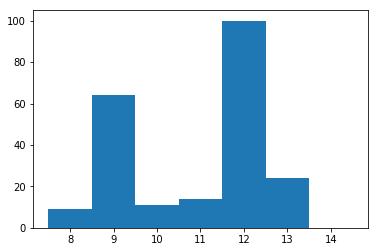

In [6]:
plt.hist([int(x) for x in dataDf.groupby("user").first().age.tolist()], bins=[7.5 + k for k in range(8)])

## Are the 9 first questions answered correctly?

In [94]:
def ChiSquare(x,y, verbose=True):
    confusion_matrix = pd.crosstab(x,y)
    chi2, p, dof, ex = ss.chi2_contingency(confusion_matrix)
    if verbose:
        print("\n=====================================")
        print(confusion_matrix)
        print("-------------------------------------")
        print("p-value: %.4f" % p)
        print("=====================================\n\n")
    return p

In [8]:
Questions_1_9 = dataDf[dataDf.step < 9].groupby(["user","question"]).first().reset_index()
Questions_10_18 = dataDf[(dataDf.step > 8) & (dataDf.step < 18)].groupby(["question","user"]).first().reset_index()
Questions_1_18 = dataDf[(dataDf.step < 18)].groupby(["question","user"]).first().reset_index()
Questions_1_18["feedback"] = Questions_1_18.step > 8
Questions_19_27 = dataDf[(dataDf.step > 17) & (dataDf.step < 27)].groupby(["question","user"]).first().reset_index()
Questions_28_36 = dataDf[(dataDf.step > 27) & (dataDf.step < 36)].groupby(["question","user"]).first().reset_index()
Questions_1_18.head(10)

,question,user,age,choice,createdAt,step,result,topic,ageGroup,feedback
0,A_E_F_C,10fee518,12,left,2019-06-17 09:21:51.428000+00:00,5,wrong,animals,11-13,False
1,A_E_F_C,1147ad30,13,right,2019-06-13 06:24:10.514000+00:00,2,correct,animals,11-13,False
2,A_E_F_C,123c90fc,10,left,2019-06-05 12:54:26.105000+00:00,5,wrong,animals,8-10,False
3,A_E_F_C,12460a06,9,left,2019-06-13 06:44:53.257000+00:00,5,wrong,animals,8-10,False
4,A_E_F_C,128880be,9,left,2019-06-05 12:53:40.690000+00:00,8,wrong,animals,8-10,False
5,A_E_F_C,131ddb1e,12,right,2019-06-17 09:21:50.644000+00:00,5,correct,animals,11-13,False
6,A_E_F_C,13c4f1b0,9,left,2019-06-05 12:52:03.119000+00:00,8,wrong,animals,8-10,False
7,A_E_F_C,1454962c,12,right,2019-05-28 12:17:35.123000+00:00,2,correct,animals,11-13,False
8,A_E_F_C,152139ff,12,left,2019-06-13 06:23:02.344000+00:00,2,wrong,animals,11-13,False
9,A_E_F_C,155d1456,9,left,2019-06-13 06:44:21.819000+00:00,5,wrong,animals,8-10,False


(0, 225)

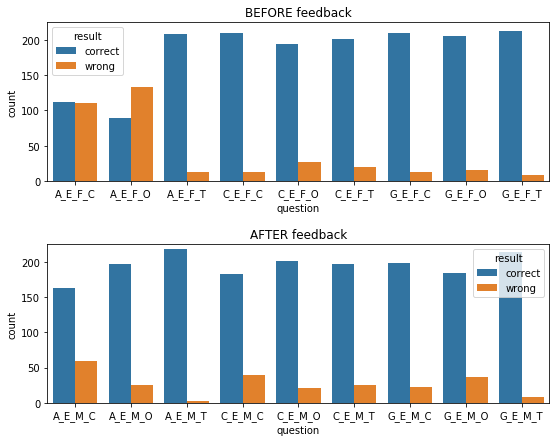

In [9]:
plt.figure(figsize=(9,7))
plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,1)
sns.countplot(x="question", hue="result", data=Questions_1_9.sort_values(by=["question","result"]))
plt.title("BEFORE feedback")
plt.ylim([0,225])

plt.subplot(2,1,2)
sns.countplot(x="question", hue="result", data=Questions_10_18.sort_values(by=["question","result"]))
plt.title("AFTER feedback")
plt.ylim([0,225])


result    correct  wrong
feedback                
False        1646    352
True         1758    240
-------------------------------------
p-value: 0.0000




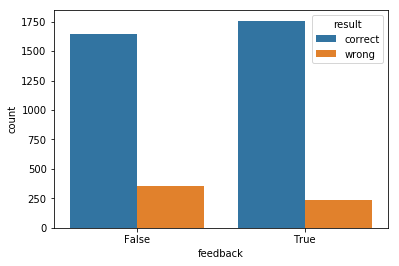

In [10]:
ChiSquare(Questions_1_18.feedback,Questions_1_18.result)
sns.countplot(x="feedback", hue="result", data=Questions_1_18.sort_values(by=["question","result"]))


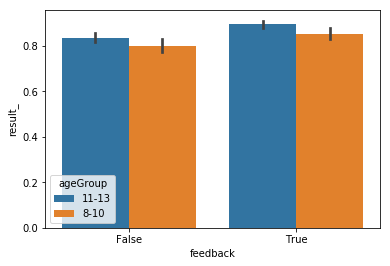

In [11]:
_D = Questions_1_18
_D["result_"] = _D.result != "wrong" 

sns.barplot(x="feedback", y="result_", hue="ageGroup", data=Questions_1_18.sort_values(by=["question","result"]))


(0, 450)

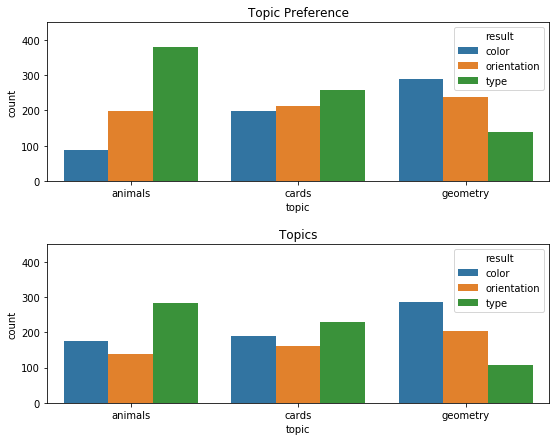

In [12]:
plt.figure(figsize=(9,7))
plt.subplots_adjust(hspace=0.4)

plt.subplot(2,1,1)
sns.countplot(x="topic", hue="result", data=Questions_19_27.sort_values(by=["question","result"]))
plt.title("Topic Preference")
plt.ylim([0,450])

plt.subplot(2,1,2)
sns.countplot(x="topic", hue="result", data=Questions_28_36.sort_values(by=["question","result"]))
plt.title("Topics")
plt.ylim([0,450])

(array([14., 46., 58., 48., 29., 13.,  6.,  1.,  2.,  4.,  1.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5]),
 <a list of 12 Patch objects>)

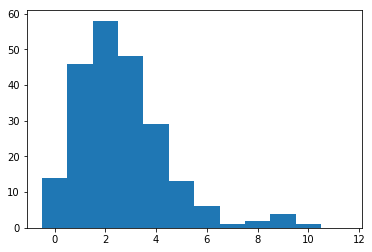

In [133]:
users = Questions_1_18.user.unique()
wrongs = Questions_1_18[Questions_1_18.result == "wrong"]
counts = [len(wrongs[wrongs.user == u]) for u in users]

plt.hist(counts, bins=[-0.5 + k for k in range(13)])

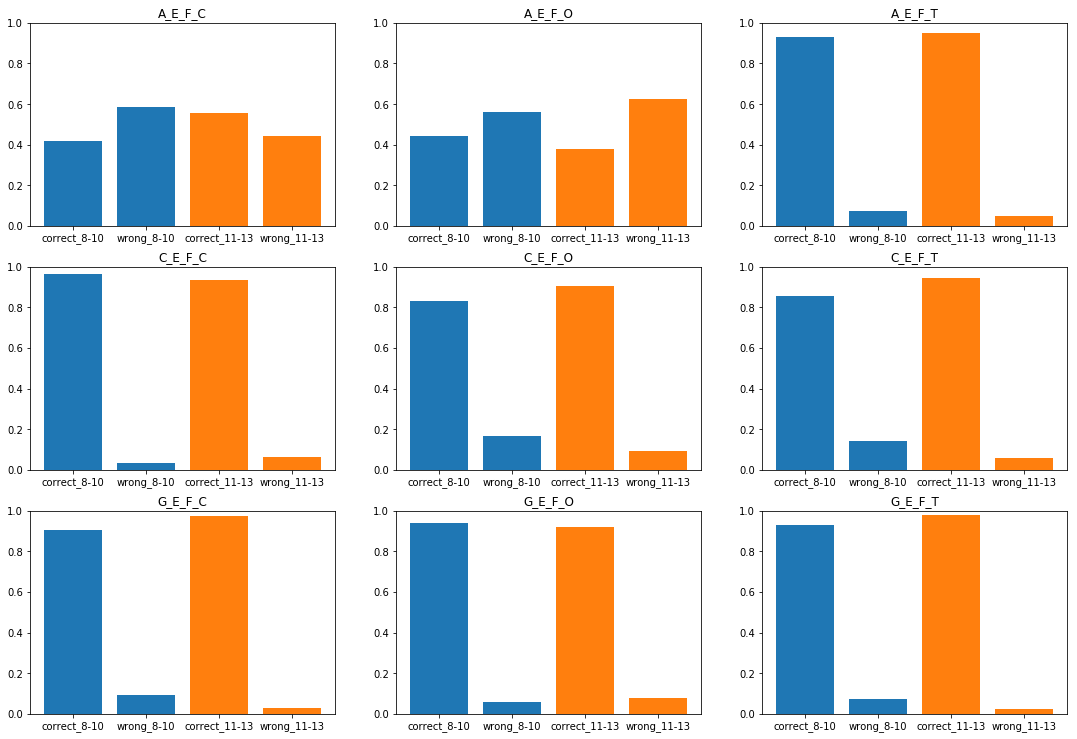

In [13]:
_D = Questions_1_9.groupby(["question","ageGroup","result"]).createdAt.count()

plt.figure(figsize=(12,8))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)

for i,q in enumerate(_D.index.levels[0]):
    plt.subplot(3,3,i+1)
    
    ly = _D.loc[q].loc["8-10"].loc["correct"] if "correct" in _D.loc[q].loc["8-10"].index else 0.001
    ry = _D.loc[q].loc["8-10"].loc["wrong"] if "wrong" in _D.loc[q].loc["8-10"].index else 0.001
    lo = _D.loc[q].loc["11-13"].loc["correct"] if "correct" in _D.loc[q].loc["11-13"].index else 0.001
    ro = _D.loc[q].loc["11-13"].loc["wrong"] if "wrong" in _D.loc[q].loc["11-13"].index else 0.001
    
    ly, ry = ly / (ly + ry), ry / (ly + ry)
    lo, ro = lo / (lo + ro), ro / (lo + ro)
    
    plt.bar(["correct_8-10","wrong_8-10"], [ly,ry])
    plt.bar(["correct_11-13","wrong_11-13"], [lo,ro])
    plt.title(q)
    plt.ylim([0,1])



## Are the features correctly answered in the questions 10-18 ?

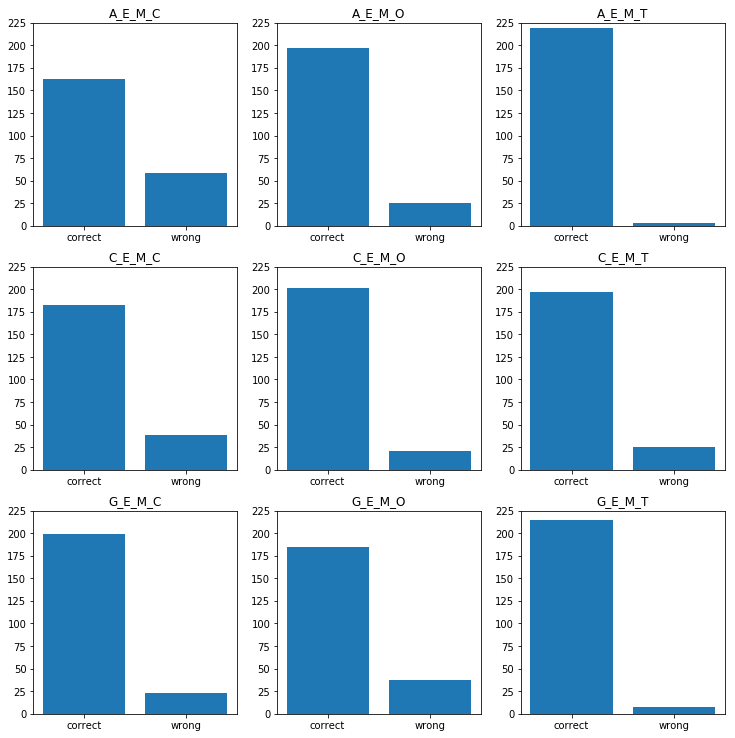

In [14]:
_D = Questions_10_18.groupby(["question","result"]).createdAt.count()

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)

for i,q in enumerate(_D.index.levels[0]):
    plt.subplot(3,3,i+1)
    l = _D.loc[q].loc["correct"] if "correct" in _D.loc[q].index else 0
    r = _D.loc[q].loc["wrong"] if "wrong" in _D.loc[q].index else 0
    plt.bar(["correct","wrong"], [l,r])
    plt.title(q)
    plt.ylim([0,225])


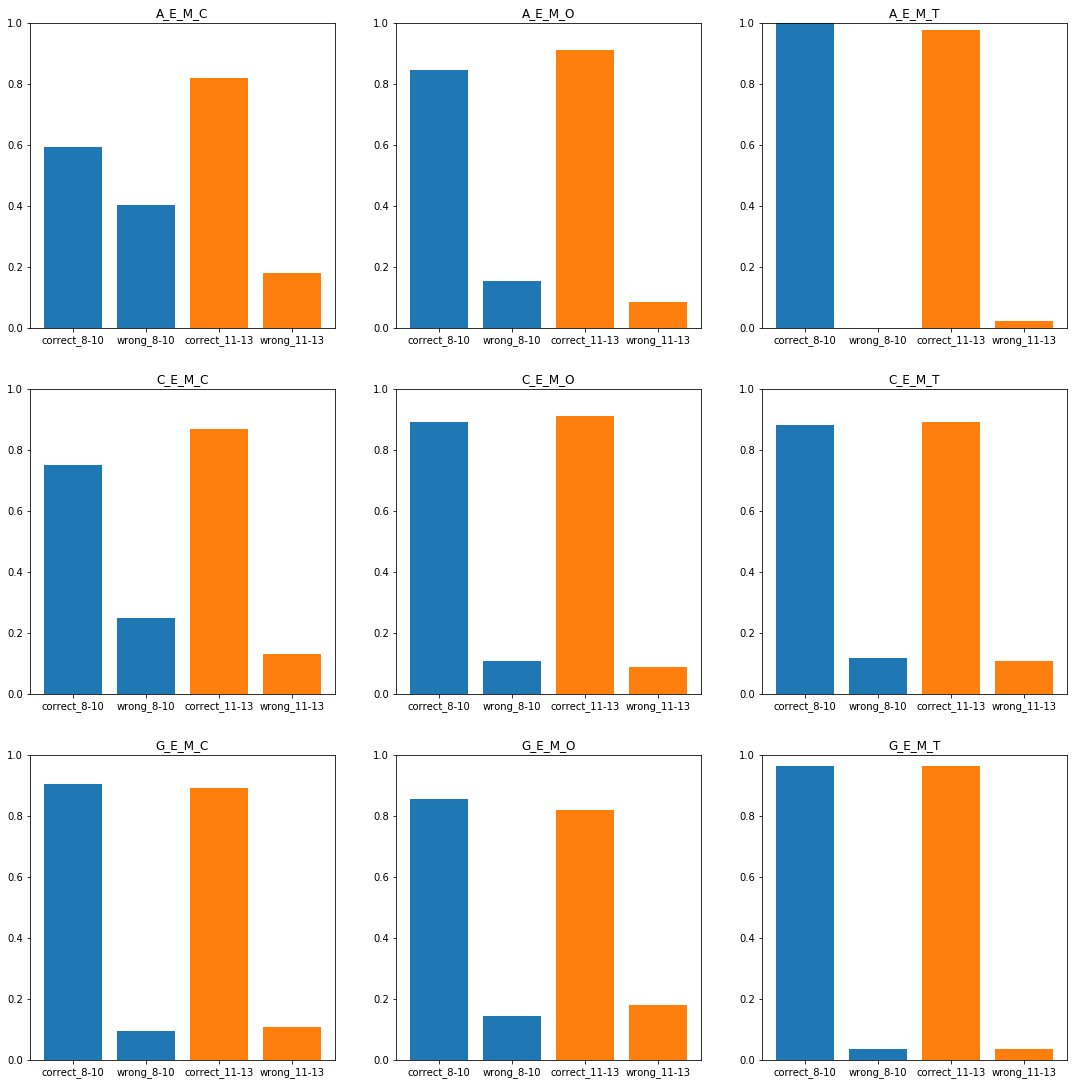

In [15]:
_D = dataDf[(dataDf.step > 8) & (dataDf.step < 18)].groupby(["question","user"]).first().groupby(["question","ageGroup","result"]).createdAt.count()

plt.figure(figsize=(12,12))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)

_D


for i,q in enumerate(_D.index.levels[0]):
    plt.subplot(3,3,i+1)
    
    ly = _D.loc[q].loc["8-10"].loc["correct"] if "correct" in _D.loc[q].loc["8-10"].index else 0.001
    ry = _D.loc[q].loc["8-10"].loc["wrong"] if "wrong" in _D.loc[q].loc["8-10"].index else 0.001
    lo = _D.loc[q].loc["11-13"].loc["correct"] if "correct" in _D.loc[q].loc["11-13"].index else 0.001
    ro = _D.loc[q].loc["11-13"].loc["wrong"] if "wrong" in _D.loc[q].loc["11-13"].index else 0.001
    
    ly, ry = ly / (ly + ry), ry / (ly + ry)
    lo, ro = lo / (lo + ro), ro / (lo + ro)
    
    plt.bar(["correct_8-10","wrong_8-10"], [ly,ry])
    plt.bar(["correct_11-13","wrong_11-13"], [lo,ro])
    plt.title(q)
    plt.ylim([0,1])


BY: 0.198 	 BO: 0.163
AY: 0.146 	 AO: 0.105


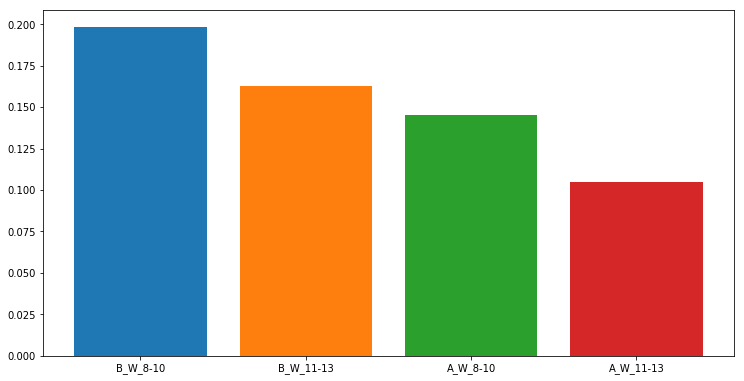

In [16]:
_D = dataDf[dataDf.step < 9].groupby(["question","user"]).first().groupby(["ageGroup","result"]).createdAt.count()

plt.figure(figsize=(8,4))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)
   
ly = _D.loc["8-10"].loc["correct"] if "correct" in _D.loc["8-10"].index else 0.001
ry = _D.loc["8-10"].loc["wrong"] if "wrong" in _D.loc["8-10"].index else 0.001
lo = _D.loc["11-13"].loc["correct"] if "correct" in _D.loc["11-13"].index else 0.001
ro = _D.loc["11-13"].loc["wrong"] if "wrong" in _D.loc["11-13"].index else 0.001
    
ly, ry = ly / (ly + ry), ry / (ly + ry)
lo, ro = lo / (lo + ro), ro / (lo + ro)
    
plt.bar(["B_W_8-10"], [ry])
plt.bar(["B_W_11-13"], [ro])

print("BY: %.3f \t BO: %.3f" % (ry,ro))

_D = dataDf[(dataDf.step > 8) & (dataDf.step < 18)].groupby(["question","user"]).first().groupby(["ageGroup","result"]).createdAt.count()
   
ly = _D.loc["8-10"].loc["correct"] if "correct" in _D.loc["8-10"].index else 0.001
ry = _D.loc["8-10"].loc["wrong"] if "wrong" in _D.loc["8-10"].index else 0.001
lo = _D.loc["11-13"].loc["correct"] if "correct" in _D.loc["11-13"].index else 0.001
ro = _D.loc["11-13"].loc["wrong"] if "wrong" in _D.loc["11-13"].index else 0.001
    
ly, ry = ly / (ly + ry), ry / (ly + ry)
lo, ro = lo / (lo + ro), ro / (lo + ro)
    
#plt.bar(["A_C_8-10","A_W_8-10"], [ly,ry])
#plt.bar(["A_C_11-13","A_W_11-13"], [lo,ro])

plt.bar(["A_W_8-10"], [ry])
plt.bar(["A_W_11-13"], [ro])

print("AY: %.3f \t AO: %.3f" % (ry, ro))


# Is feature choices correlated between topics ?

In [39]:
def computeUniqueId(row):
    if row.step < 18:
        return row.question + "_INTRO"
    if row.step < 36:
        return row.question + "_CORE"
    if row.step in [36, 38, 40, 45, 47, 49, 54, 56, 58]:
        return row.question + "_TRIK"
    if row.step in [37, 39, 41, 46, 48, 50, 55, 57, 59]:
        return row.question + "_FLEX"
    return row.question + "_DELY"

dataDf["uniqueQuestionID"] = dataDf.apply(computeUniqueId, axis = 1)

In [40]:
dataDf.head()

,age,choice,createdAt,question,step,user,result,topic,ageGroup,uniqueQuestionID
563,12,left,2019-05-28 12:17:02.647000+00:00,A_E_F_T,0,1454962c,correct,animals,11-13,A_E_F_T_INTRO
14670,12,left,2019-05-28 12:17:09.350000+00:00,A_E_F_T,0,d09631e3,correct,animals,11-13,A_E_F_T_INTRO
576,12,left,2019-05-28 12:17:11.176000+00:00,A_E_F_O,1,1454962c,wrong,animals,11-13,A_E_F_O_INTRO
14612,12,left,2019-05-28 12:17:16.655000+00:00,A_E_F_O,1,d09631e3,wrong,animals,11-13,A_E_F_O_INTRO
8022,12,left,2019-05-28 12:17:17.341000+00:00,A_E_F_T,0,6a36b606,correct,animals,11-13,A_E_F_T_INTRO


In [35]:
_D = dataDf.groupby(["user", "uniqueQuestionID"]).first().reset_index()
rows = []
for user in dataDf.user.unique():
    userSequence = [x[1] for x in _D[_D.user == user].iterrows()]
    userRow = { "user": user }
    for q in userSequence:
        userRow[q.uniqueQuestionID] = q.result
    rows.append(userRow)
userDf = pd.DataFrame(rows).set_index("user")

In [36]:
userDf.head()

,A_E_F_C_INTRO,A_E_F_O_INTRO,A_E_F_T_INTRO,A_E_M_C_INTRO,A_E_M_O_INTRO,A_E_M_T_INTRO,A_H_F_CO_CORE,A_H_F_CO_DELY,A_H_F_CO_TRIK,A_H_F_CT_CORE,...,G_H_F_CT_TRIK,G_H_F_OT_CORE,G_H_F_OT_DELY,G_H_F_OT_TRIK,G_H_M_CO_CORE,G_H_M_CO_FLEX,G_H_M_CT_CORE,G_H_M_CT_FLEX,G_H_M_OT_CORE,G_H_M_OT_FLEX
user,,,,,,,,,,,,,,,,,,,,,
1454962c,correct,wrong,correct,correct,correct,correct,orientation,color,color,color,...,color,orientation,type,orientation,orientation,color,type,color,type,orientation
d09631e3,correct,wrong,correct,wrong,correct,correct,orientation,color,orientation,type,...,color,orientation,type,orientation,orientation,color,color,color,orientation,type
6a36b606,correct,wrong,correct,correct,correct,correct,color,color,orientation,type,...,type,type,type,type,color,orientation,type,type,type,type
a3344a41,wrong,correct,wrong,correct,correct,correct,color,color,orientation,type,...,type,orientation,type,orientation,color,orientation,color,color,orientation,type
a2289c75,correct,wrong,correct,correct,correct,correct,orientation,orientation,orientation,type,...,color,orientation,type,orientation,color,orientation,color,color,orientation,type


In [153]:
introQuestions = [
    'A_E_F_C_INTRO', 'A_E_F_O_INTRO', 'A_E_F_T_INTRO',
    'C_E_F_C_INTRO', 'C_E_F_O_INTRO', 'C_E_F_T_INTRO', 
    'G_E_F_C_INTRO', 'G_E_F_O_INTRO', 'G_E_F_T_INTRO',
    
    'A_E_M_C_INTRO', 'A_E_M_O_INTRO', 'A_E_M_T_INTRO',
    'C_E_M_C_INTRO', 'C_E_M_O_INTRO', 'C_E_M_T_INTRO', 
    'G_E_M_C_INTRO', 'G_E_M_O_INTRO', 'G_E_M_T_INTRO'
]

coreQuestions = [
    'A_H_F_OT_CORE', 'A_H_F_CT_CORE', 'A_H_F_CO_CORE',
    'C_H_F_OT_CORE', 'C_H_F_CT_CORE', 'C_H_F_CO_CORE', 
    'G_H_F_OT_CORE', 'G_H_F_CT_CORE', 'G_H_F_CO_CORE', 
    
    'A_H_M_OT_CORE', 'A_H_M_CT_CORE', 'A_H_M_CO_CORE',
    'C_H_M_OT_CORE', 'C_H_M_CT_CORE', 'C_H_M_CO_CORE'
    'G_H_M_OT_CORE', 'G_H_M_CT_CORE', 'G_H_M_CO_CORE', 
]


geometryIntroToCore = [
    'G_E_F_C_INTRO', 'G_E_F_O_INTRO', 'G_E_F_T_INTRO',
    'G_E_M_C_INTRO', 'G_E_M_O_INTRO', 'G_E_M_T_INTRO',
    'G_H_F_OT_CORE', 'G_H_F_CT_CORE', 'G_H_F_CO_CORE', 
    'G_H_M_OT_CORE', 'G_H_M_CT_CORE', 'G_H_M_CO_CORE', 
]
animalsIntroToCore = [
    'A_E_F_C_INTRO', 'A_E_F_O_INTRO', 'A_E_F_T_INTRO',
    'A_E_M_C_INTRO', 'A_E_M_O_INTRO', 'A_E_M_T_INTRO',
    'A_H_F_OT_CORE', 'A_H_F_CT_CORE', 'A_H_F_CO_CORE', 
    'A_H_M_OT_CORE', 'A_H_M_CT_CORE', 'A_H_M_CO_CORE', 
]
cardsIntroToCore = [
    'C_E_F_C_INTRO', 'C_E_F_O_INTRO', 'C_E_F_T_INTRO',
    'C_E_M_C_INTRO', 'C_E_M_O_INTRO', 'C_E_M_T_INTRO',
    'C_H_F_OT_CORE', 'C_H_F_CT_CORE', 'C_H_F_CO_CORE', 
    'C_H_M_OT_CORE', 'C_H_M_CT_CORE', 'C_H_M_CO_CORE', 
]

trickQuestions = [
    'G_H_F_OT_TRIK', 'G_H_M_OT_FLEX', 
    'C_H_F_CO_TRIK', 'C_H_M_CO_FLEX',
    'A_H_F_CT_TRIK', 'A_H_M_CT_FLEX', 
    'G_H_F_OT_DELY', 'C_H_F_CO_DELY', 'A_H_F_CT_DELY', 
    'A_H_F_OT_TRIK', 'A_H_M_OT_FLEX', 
    'C_H_F_CT_TRIK', 'C_H_M_CT_FLEX', 
    'G_H_F_CO_TRIK', 'G_H_M_CO_FLEX', 
    'A_H_F_OT_DELY', 'C_H_F_CT_DELY', 'G_H_F_CO_DELY', 
    'C_H_F_OT_TRIK', 'C_H_M_OT_FLEX',
    'G_H_F_CT_TRIK', 'G_H_M_CT_FLEX', 
    'A_H_F_CO_TRIK', 'A_H_M_CO_FLEX',
    'C_H_F_OT_DELY', 'G_H_F_CT_DELY', 'A_H_F_CO_DELY'
]

In [158]:
cols = introQuestions

rows = []
for q1 in cols:
    row = [ q1 ]
    for q2 in cols:
        row.append(-np.log(max(1e-5, ChiSquare(userDf[q1], userDf[q2], verbose=False))))
        #row.append(ChiSquare(userDf[q1], userDf[q2]))
    rows.append(row)

In [159]:
_df = pd.DataFrame(rows, columns=["question"] + cols).set_index("question")
_df.head()

,A_E_F_C_INTRO,A_E_F_O_INTRO,A_E_F_T_INTRO,C_E_F_C_INTRO,C_E_F_O_INTRO,C_E_F_T_INTRO,G_E_F_C_INTRO,G_E_F_O_INTRO,G_E_F_T_INTRO,A_E_M_C_INTRO,A_E_M_O_INTRO,A_E_M_T_INTRO,C_E_M_C_INTRO,C_E_M_O_INTRO,C_E_M_T_INTRO,G_E_M_C_INTRO,G_E_M_O_INTRO,G_E_M_T_INTRO
question,,,,,,,,,,,,,,,,,,
A_E_F_C_INTRO,11.512925,0.091501,1.430321,2.044298,0.330887,4.736473,0.234184,0.880715,1.802565,1.635389,0.995157,0.012614,0.050675,1.859389,2.516460,2.649721,0.269118,1.314547
A_E_F_O_INTRO,0.091501,11.512925,0.143331,2.269290,0.252191,0.737285,1.183205,2.280252,0.061705,0.232051,0.178976,0.322457,0.381403,0.030734,0.649842,0.105222,0.102574,0.186740
A_E_F_T_INTRO,1.430321,0.143331,11.512925,3.768452,4.538656,3.908554,0.225939,0.463425,1.842084,0.023528,1.053111,0.862724,0.138134,0.233455,1.053111,11.512925,0.225387,2.174700
C_E_F_C_INTRO,2.044298,2.269290,3.768452,11.512925,1.065062,0.409343,0.168060,5.994946,0.016359,1.361078,1.270047,0.954156,0.274616,0.340591,1.270047,0.219981,-0.000000,2.417845
C_E_F_O_INTRO,0.330887,0.252191,4.538656,1.065062,11.512925,0.039417,0.029807,0.323975,0.396074,2.101501,0.267411,0.210633,0.381232,1.900334,1.069683,2.679624,-0.000000,2.380607


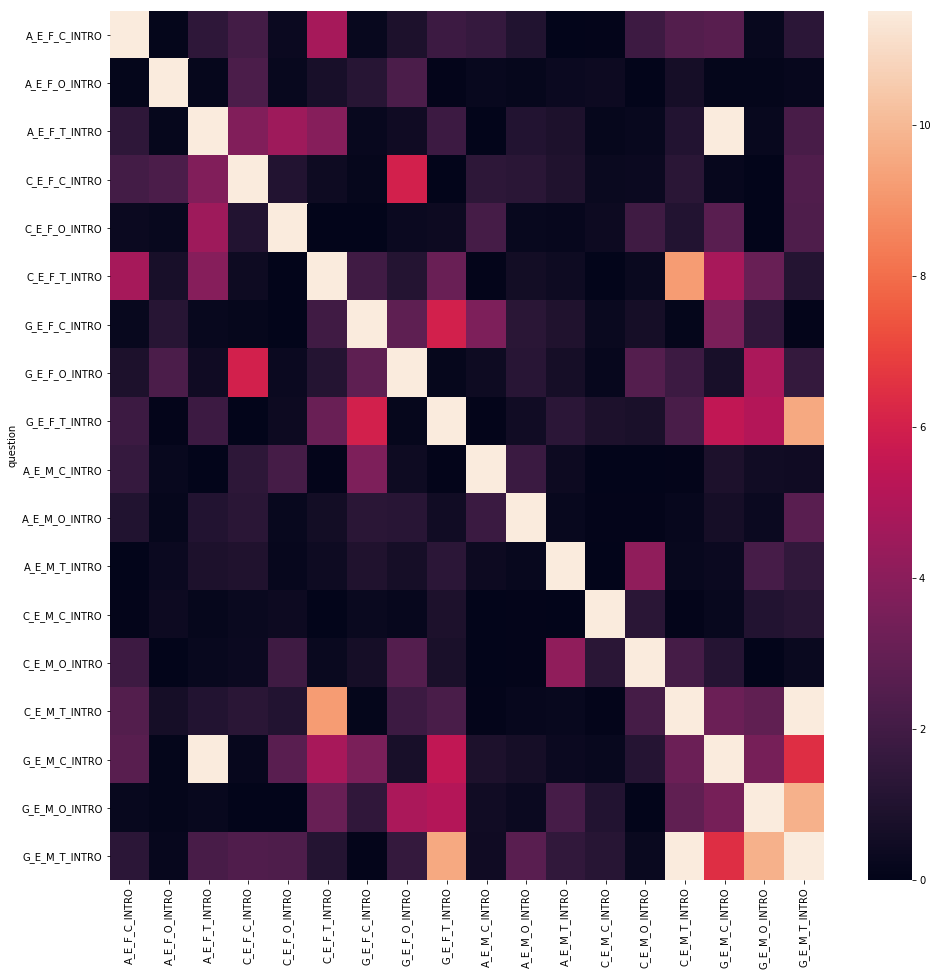

In [160]:
plt.figure(figsize=(16,16))
sns.heatmap(_df)

In [97]:
ChiSquare(userDf["G_H_M_CO_CORE"], userDf["C_H_M_CO_CORE"])


C_H_M_CO_CORE  color  orientation
G_H_M_CO_CORE                    
color             87           43
orientation       37           55
-------------------------------------
p-value: 0.0001




0.00013879150681610209

## Do hard questions reveal a preference of students (19-27)

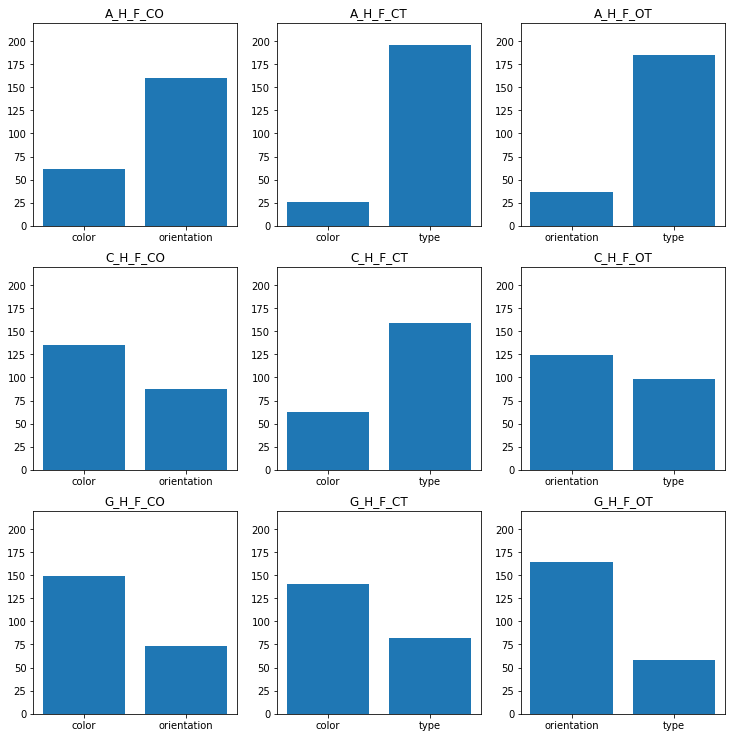

In [20]:
_D = dataDf[(dataDf.step > 17) & (dataDf.step < 27)].groupby(["question","user"]).first().groupby(["question","result"]).createdAt.count()

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)

def filterBars(array):
    [c,o,t] = array
    x = ["orientation","type"] if c == 0 else ["color","type"] if o == 0 else ["color","orientation"]
    y = [o,t] if c == 0 else [c,t] if o == 0 else [c,o]
    return x,y

for i,q in enumerate(_D.index.levels[0]):
    plt.subplot(3,3,i+1)
    c = _D.loc[q].loc["color"] if "color" in _D.loc[q].index else 0
    o = _D.loc[q].loc["orientation"] if "orientation" in _D.loc[q].index else 0
    t = _D.loc[q].loc["type"] if "type" in _D.loc[q].index else 0
    
    x,y = filterBars([c,o,t])
    plt.bar(x,y)
    plt.title(q)
    plt.ylim([0,220])
    

## Do hard questions reveal a preference of students (28-36)

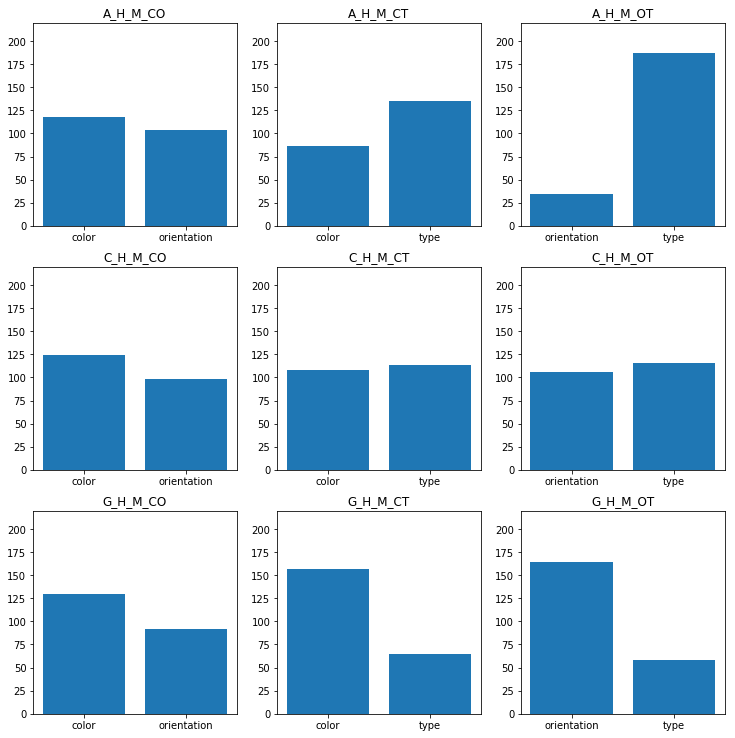

In [21]:
_D = dataDf[(dataDf.step > 26) & (dataDf.step < 36)].groupby(["question","user"]).first().groupby(["question","result"]).createdAt.count()

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)

for i,q in enumerate(_D.index.levels[0]):
    plt.subplot(3,3,i+1)
    c = _D.loc[q].loc["color"] if "color" in _D.loc[q].index else 0
    o = _D.loc[q].loc["orientation"] if "orientation" in _D.loc[q].index else 0
    t = _D.loc[q].loc["type"] if "type" in _D.loc[q].index else 0
    
    
    x,y = filterBars([c,o,t])
    plt.bar(x,y)
    plt.title(q)
    plt.ylim([0,220])
    

## Does success rate to discover properties depends on the step (1-9) ? 

[array([531, 135]), array([562, 104]), array([553, 113])]


<Figure size 576x576 with 0 Axes>

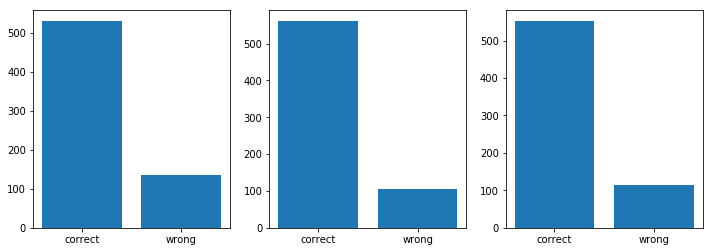

In [22]:
_D = dataDf[dataDf.step < 9].groupby(["question","user"]).first().groupby(["question","step","result"]).createdAt.count()

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=2.4, wspace=None, hspace=None)

i = 1
total = [np.array([0,0]),np.array([0,0]),np.array([0,0])]

for q in _D.index.levels[0]:
    for s in _D.loc[q].index.levels[0]:
        if s not in _D.loc[q].index: continue
        l = _D.loc[q].loc[s].loc["correct"] if "correct" in _D.loc[q].loc[s].index else 0
        r = _D.loc[q].loc[s].loc["wrong"] if "wrong" in _D.loc[q].loc[s].index else 0

        #plt.subplot(9,3,i)
        i += 1
        total[int(s/3) ] += np.array([l,r])
        #plt.bar(["correct","wrong"], [l,r])
        #plt.title(str(q) + "-" + str(s))
        #plt.ylim([0,80])
        
print(total)
i = 0
plt.figure(figsize=(12,4))
for x in total:
    i+=1
    plt.subplot(1,3,i)
    plt.bar(["correct", "wrong"], x)
plt.show()

## Are feature coherently dominated?

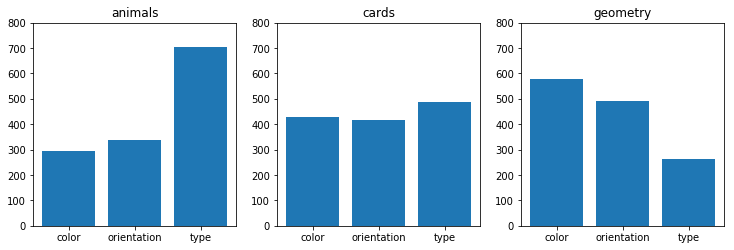

In [23]:
_D = dataDf[(dataDf.step > 17) & (dataDf.step < 36)].groupby(["question","user"]).first().groupby(["topic","result"]).createdAt.count()

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)

for i,q in enumerate(_D.index.levels[0]):
    plt.subplot(3,3,i+1)
    c = _D.loc[q].loc["color"] if "color" in _D.loc[q].index else 0
    o = _D.loc[q].loc["orientation"] if "orientation" in _D.loc[q].index else 0
    t = _D.loc[q].loc["type"] if "type" in _D.loc[q].index else 0
    plt.bar(["color","orientation","type"], [c,o,t])
    plt.title(q)
    plt.ylim([0,800])
    
    

## Are student coherent?

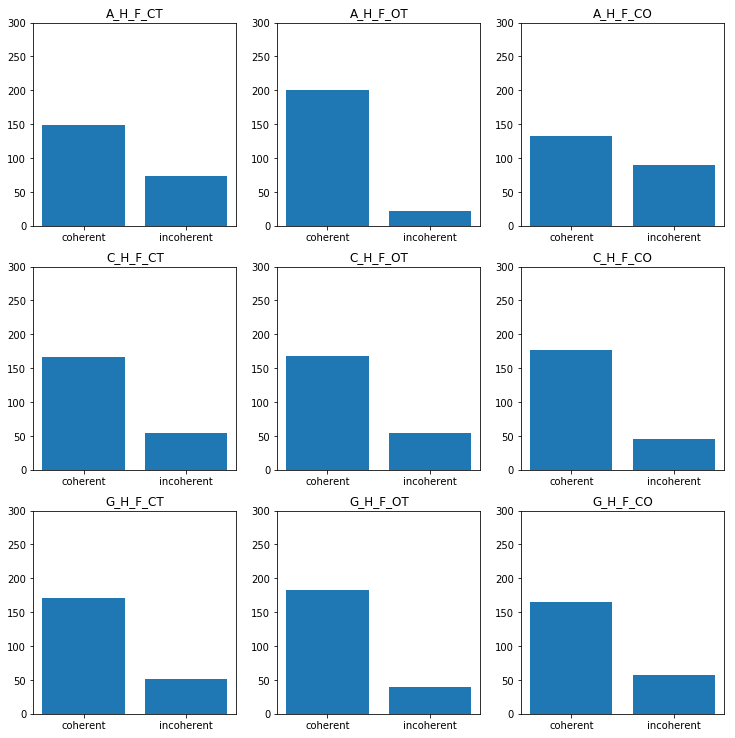

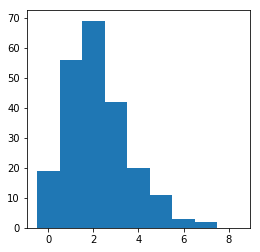

In [24]:
_D = dataDf[(dataDf.step > 17) & (dataDf.step < 36)]

results = [[0,0] for _ in range(9)]
studentTypes = []

for student in _D.user.unique():
    _S = _D[(_D.user == student)]
    incoherenceCount = 0
    for i in range(9):
        aF = _S[_S.question == qHF[i]].result.tolist()[0]
        aM = _S[_S.question == qHM[i]].result.tolist()[0]
        if aF == aM:
            results[i][0] += 1
        else:
            results[i][1] += 1
            incoherenceCount += 1
    studentTypes.append(incoherenceCount)
            

plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0., bottom=0., right=1.2, top=1.2, wspace=None, hspace=None)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.bar(["coherent","incoherent"], results[i])
    plt.title(qHF[i])
    plt.ylim([0,300])
    
plt.figure(figsize=(4,4))
plt.hist(studentTypes, bins=[-0.5 + k for k in range(10)])
plt.show()

(array([1.3365e+04, 3.0091e+04, 3.0319e+04, 1.7621e+04, 6.6370e+03,
        1.6370e+03, 3.0200e+02, 2.6000e+01, 2.0000e+00]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Patch objects>)

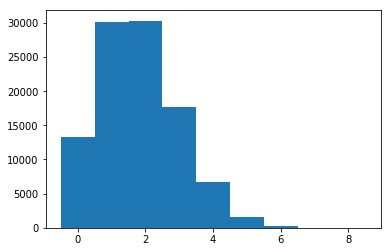

In [25]:
counts = [ sum([np.random.random()>0.8 for _ in range(9)]) for _ in range(100000) ]

plt.hist(counts, bins=[-0.5 + k for k in range(10)])



## Are student coherent in the choice of feature?

['color' 'type']


/Users/louisfaucon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['orientation' 'type']
['orientation' 'color']
['type' 'color']
['orientation' 'type']
['orientation' 'color']
['color' 'type']
['orientation' 'type']
['color' 'orientation']


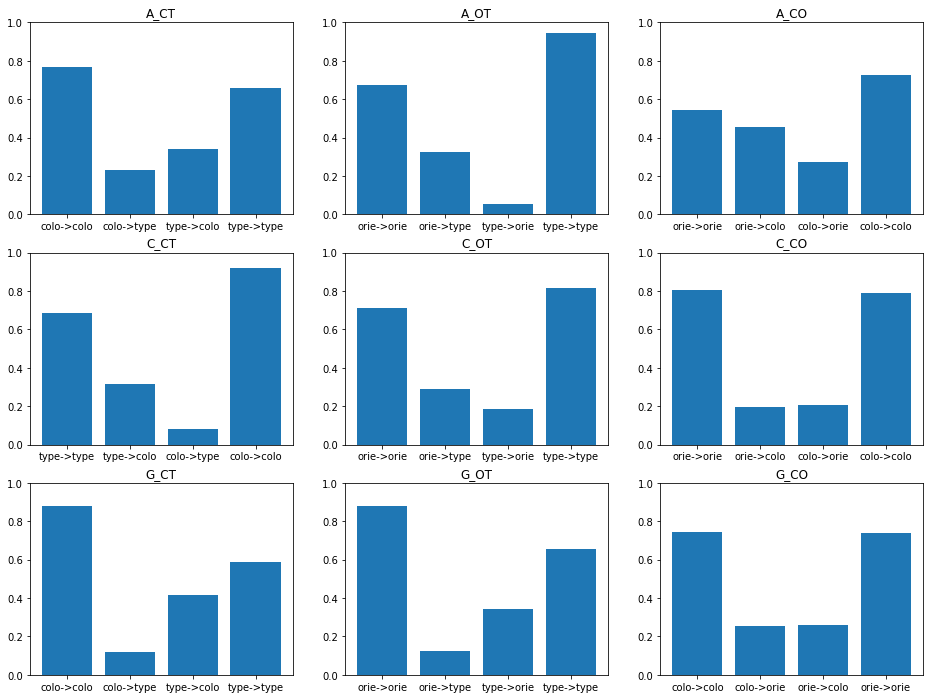

In [26]:
_D = dataDf

_students = []

for student in _D.user.unique():
    _S = _D[_D.user == student]
    for i in range(9):
        answers = _S[(_S.question == qHF[i]) | (_S.question == qHM[i])].result.tolist()
        _students.append({
            'question': qHF[i],
            'answer1': answers[0],
            'answer2': answers[1],
            'ageGroup': _S.ageGroup.tolist()[0]
        })

Feature_Choices_Combined = pd.DataFrame(_students)
Feature_Choices_Combined.head()


plt.figure(figsize=(16,12))
i = 1
for q in qHF:
    _D = Feature_Choices_Combined[Feature_Choices_Combined.question == (q)]
    v = _D.answer1.unique()
    print(v)
    _D["combined"] = _D.answer1 + _D.answer2
    
    a, A = sum(_D.combined == v[0] + v[0]), sum(_D.combined == v[0] + v[1])
    b, B = sum(_D.combined == v[1] + v[0]), sum(_D.combined == v[1] + v[1])
    
    a, A = a / (a + A), A / (a + A)
    b, B = b / (b + B), B / (b + B)
    
    plt.subplot(3,3,i)
    plt.title(q[0] + q[-3:])
    plt.bar([v[0][:4] + "->" + v[0][:4],v[0][:4] + "->" + v[1][:4],v[1][:4] + "->"  + v[0][:4],v[1][:4] + "->"  + v[1][:4]], [a,A,b,B])
    plt.ylim([0,1])
    i += 1
    

In [27]:
Feature_Choices_Combined.head()

,ageGroup,answer1,answer2,question
0,11-13,color,color,A_H_F_CT
1,11-13,orientation,orientation,A_H_F_OT
2,11-13,orientation,color,A_H_F_CO
3,11-13,type,color,C_H_F_CT
4,11-13,orientation,orientation,C_H_F_OT


## Are student resistant to change?

In [28]:
_D = dataDf

_students = []
_delays = []

for student in _D.user.unique():
    _S = _D[(_D.user == student)]
    incoherenceCount = 0
    for i in range(9):
        answers = _S[(_S.question == qHF[i]) | (_S.question == qHM[i])].result.tolist()
        if len(answers) < 6:
            print(answers)
            continue

        _students.append({
            "user": _S.user.tolist()[0],
            'coherent1': answers[0] == answers[1],
            'coherent2': answers[0] == answers[2],
            'flexible1': answers[3] == answers[4],
            'flexible2': answers[3] == answers[5],
            'ageGroup': _S.ageGroup.tolist()[0]
        })
        
        _delays.append({
            "user": _S.user.tolist()[0],
            'ageGroup': _S.ageGroup.tolist()[0],
            "delay": False,
            'flexible': answers[3] == answers[4],
        })
        _delays.append({
            "user": _S.user.tolist()[0],
            'ageGroup': _S.ageGroup.tolist()[0],
            "delay": True,
            'flexible': answers[3] == answers[5],
        })

Coherence_Flexibility = pd.DataFrame(_students)
Coherence_Flexibility["coherent"] = Coherence_Flexibility.coherent1 & Coherence_Flexibility.coherent2

Delay_Flexibility = pd.DataFrame(_delays)

Coherence_Flexibility.head(12)


['type', 'type', 'type', 'orientation', 'type']
['orientation', 'orientation']
['type', 'type', 'color', 'type']
['orientation', 'type']
['type', 'color']
['color', 'orientation']
['color', 'color', 'color', 'orientation']
['type', 'orientation', 'orientation', 'type', 'type']
['color', 'color', 'color', 'type', 'color']


,ageGroup,coherent1,coherent2,flexible1,flexible2,user,coherent
0,11-13,True,False,True,False,1454962c,False
1,11-13,True,False,True,False,1454962c,False
2,11-13,False,False,True,False,1454962c,False
3,11-13,False,False,True,False,1454962c,False
4,11-13,True,True,True,False,1454962c,True
5,11-13,True,True,True,False,1454962c,True
6,11-13,False,True,False,False,1454962c,False
7,11-13,False,True,False,True,1454962c,False
8,11-13,False,True,False,False,1454962c,False
9,11-13,True,False,True,False,d09631e3,False


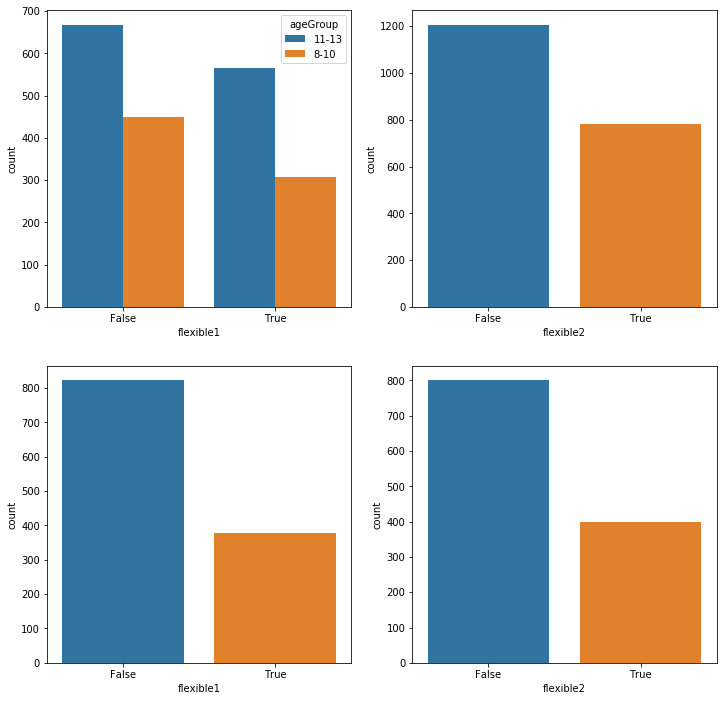

In [29]:
plt.figure(figsize=(12,12))

plt.title("")
plt.subplot(2,2,1)
sns.countplot(x="flexible1", hue="ageGroup", data=Coherence_Flexibility)
plt.subplot(2,2,2)
sns.countplot(x="flexible2", data=Coherence_Flexibility)


plt.subplot(2,2,3)
sns.countplot(x="flexible1", data=Coherence_Flexibility[Coherence_Flexibility.coherent1 & Coherence_Flexibility.coherent2])
plt.subplot(2,2,4)
sns.countplot(x="flexible2", data=Coherence_Flexibility[Coherence_Flexibility.coherent1 & Coherence_Flexibility.coherent2])


plt.show()

In [30]:
sum(_resultDf.flexible1), len(_resultDf.flexible1) - sum(_resultDf.flexible1)

NameError: name '_resultDf' is not defined

In [ ]:
_resultDf.head()

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Flexibility without delay")
sns.barplot(x="ageGroup", y="flexible1", data=_resultDf)
plt.ylim([0,0.6])

plt.subplot(1,2,2)
plt.title("Flexibility with delay")
sns.barplot(x="ageGroup", y="flexible2", data=_resultDf)
plt.ylim([0,0.6])

In [ ]:
plt.figure(figsize=(6,6))

sns.barplot(x="delay", y="flexible", data=Delay_Flexibility)
plt.ylim([0,0.6])
ChiSquare(Delay_Flexibility.delay,Delay_Flexibility.flexible)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.25,hspace=0.25)

plt.subplot(2,2,1)
plt.title("SHORT TERM flexibility")
sns.barplot(x="coherent", y="flexible1", data=Coherence_Flexibility)
plt.ylim([0,1])

plt.subplot(2,2,2)
plt.title("LONG TERM flexibility")
sns.barplot(x="coherent", y="flexible2", data=Coherence_Flexibility)
plt.ylim([0,1])

plt.subplot(2,2,3)
sns.barplot(x="flexible1", y="flexible2", data=Coherence_Flexibility[Coherence_Flexibility.coherent])
plt.ylim([0,1])

plt.subplot(2,2,4)
sns.barplot(x="flexible1", y="flexible2", data=Coherence_Flexibility[Coherence_Flexibility.coherent != True])
plt.ylim([0,1])

In [ ]:
_resultDf.groupby("coherent").flexible1.value_counts()

##

##

##

In [ ]:
Feature_Choices_Combined.head()

In [ ]:
print("RQ: Is success on recognizing features BEFORE feedback dependent on topic ?")
ChiSquare(Questions_1_9.topic,Questions_1_9.result)

print("RQ: Is success on recognizing features BEFORE feedback dependent on agegroup ?")
ChiSquare(Questions_1_9.ageGroup,Questions_1_9.result)

print("RQ: Is success on recognizing features improved by the feedback ?")
ChiSquare(Questions_1_18.feedback,Questions_1_18.result)

print("RQ: Is success on recognizing features AFTER feedback dependent on topic ?")
ChiSquare(Questions_10_18.topic, Questions_10_18.result)

print("RQ: Is success on recognizing features AFTER feedback dependent on agegroup ?")
ChiSquare(Questions_10_18.ageGroup, Questions_10_18.result)

print("RQ: Is feature preference dependant on the topic ?")
ChiSquare(Questions_19_27.topic, Questions_19_27.result)
ChiSquare(Questions_28_36.topic, Questions_28_36.result)

print("RQ: Is feature preference consistent ?")
for q in qHF:
    _D = Feature_Choices_Combined[Feature_Choices_Combined.question == q]
    ChiSquare(_D.answer1, _D.answer2)

print("RQ: Does delay affects flexibility ?")
ChiSquare(Delay_Flexibility.delay,Delay_Flexibility.flexible)    

print("RQ: Is flexibility dependent on previous coherence ?")
ChiSquare(Coherence_Flexibility.coherent, Coherence_Flexibility.flexible1)
ChiSquare(Coherence_Flexibility.coherent, Coherence_Flexibility.flexible2)
    
print("RQ: Is flexibility dependent on ageGroup ?")
ChiSquare(Coherence_Flexibility.ageGroup, Coherence_Flexibility.flexible1)
ChiSquare(Coherence_Flexibility.ageGroup, Coherence_Flexibility.flexible2)

